# Lab Work 1: Working with missing data
This excercise should give you some practice in working with missing data of different feature types

## Load the iris dataset with missing values into a dataframe 
File: datasets.zip/datasets/iris/data_someMissing.all

Hint: When data is missing, pandas might not be able to determine the proper type of columns by itself. Look carefully at the data types and act accordingly! You have different options to change the types of columns:
* When reading, have a look at [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), esp the parameter *na_filter*
* In memory, have a look at [dataframe.astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) and the transformation functions [dataframe.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) in combination with [pandas.to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)

### In this Praktikum assignment we are going to work with missing data in the dataset, the ways how to handle and preprocess it.

First we import all necessary libraries like pandas to work with dataframes, Seaborn to show the scatter matrix and classes of SciKitLearn to be able to work with a Decision Tree Regressor.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

Now we read the .csv file `data_someMissing.all` with `read_csv` setting a space separator, removing the header and letting dataframe know that whenever there is a `?` value in any column to set this value to NaN. This is done with help of parameter `na_values`. There is also a possibility to create a new column and mark there defective values or remove feature vector from feature set, but we stick to replacing `?` values with NaN. Then we set our custom headers: Sepal Length (sl), Sepal Width (sw), Petal Length (pl), and Petal Width (pw), Flower class (class). Since the dataset is of string type, we cast sl, sw, pl, pw to `float` datatype to be able to work and make operations with them afterwards.

From the table, we can deduce that we have 150 elements, and for each element, there are measurements of Sepal Length (sl), Sepal Width (sw), Petal Length (pl), and Petal Width (pw) as well as a class.

In [7]:
df = pd.read_csv('datasets/datasets/iris/data_someMissing.all', sep=' ', header = None, na_values=['?'])
df.columns = ['sl', 'sw', 'pl', 'pw', 'class']
df = df.astype({'sl': 'float', 'sw': 'float', 'pl': 'float', 'pw': 'float'})
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


With the help of function `isna()` we can see an amount missing values and which column they belong to.

In [8]:
df.isna().sum()

sl       1
sw       1
pl       1
pw       2
class    1
dtype: int64

## What are your options to work with the missing values? 
#### There are multiple simple options how to handle missing data in dataset: for continuous numerical values it would be removing rows with missing values, an imputation with mean strategy, an interpolation based on distances between values; for categorical values would be an imputation with forward fill (ffill) or backward fill (bfill) for categorical values, imputation with Mode (Most Frequent Category) for categorical values and others.
* Option 1(numerical): `drop` rows with missing values
* Option 2(numerical): `interpolation` based on distances between values
* Option 3(numerical): replace numerical values with `mean` value
---
* Option 1(categorical): `drop` rows with missing values
* Option 2(categorical): replace categorical data with imputation with `forward fill` (ffill) or `backward fill` (bfill), provided that this method is confirmed by the domain expert
* Option 3(categorical): replace categorical data with predicted values using `DecisionTreeRegressor`

## What is their difference with respect to the features of the dataset and the class associations? 
#### There are obvious differences between categorical and numerical values in the dataset. In the following we will describe the differences between two options in numerical and categorical data.

* Option 1(numerical): Drops rows with missing values with the function `dropna()`. <br>
* Option 2(numerical): Replaces missing data with linear interpolation method with the function `interpolate()`. <br>
* Option 3(numerical): Replaces missing values with the mean (average) of the non-missing values in the column. The mean is calculated by summing all non-missing values in the column and dividing by the number of non-missing values.
---
* Option 1(categorical): Drops rows with missing values with the function `dropna()`. <br>
* Option 2(categorical): Fills missing values with the previous or subsequent valid value in the column. This is useful when missing values follow some pattern or order. Has to be confirmed by the domain expert and data collector though. <br>
* Option 3(categorical): We use machine learning model to predict missing categorical values based on other features. For this, we would split our dataset into two parts: one with non-missing values and another with missing values. Train a model on the non-missing part to predict the missing values based on other features. We use DecisionTreeRegressor algorithm for this task.

## Implement some of the options for the dataset
* check, how these options change the statistical values of
  * each feature
  * each class
* useful functions in pandas for this step
  * find out, if a value [is null](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)
  * [removing data that null ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna)
  * [fill null data with other value](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
  * [replace values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

### Numerical data.

#### Option 1(numerical and categorical):
We copy the dataframe and use `dropna()` function to remove rows with NaN values. Then we check the amount of NaNs in dataset again with `isna().sum()` function.

In [9]:
data_drop = df.copy()
data_drop.dropna(inplace=True)
data_drop.isna().sum()

sl       0
sw       0
pl       0
pw       0
class    0
dtype: int64

As you can see, we removed all the rows with NaN values, which means there are not any NaN values neither in columns with numerical values nor in columns with categorical values.

#### Option 2(numerical):

We use `Seaborn` to show the scatter matrix and to have a rough understanding what the graphical representation of the dataframe looks like and which interpolation method is optimal to use in this case.

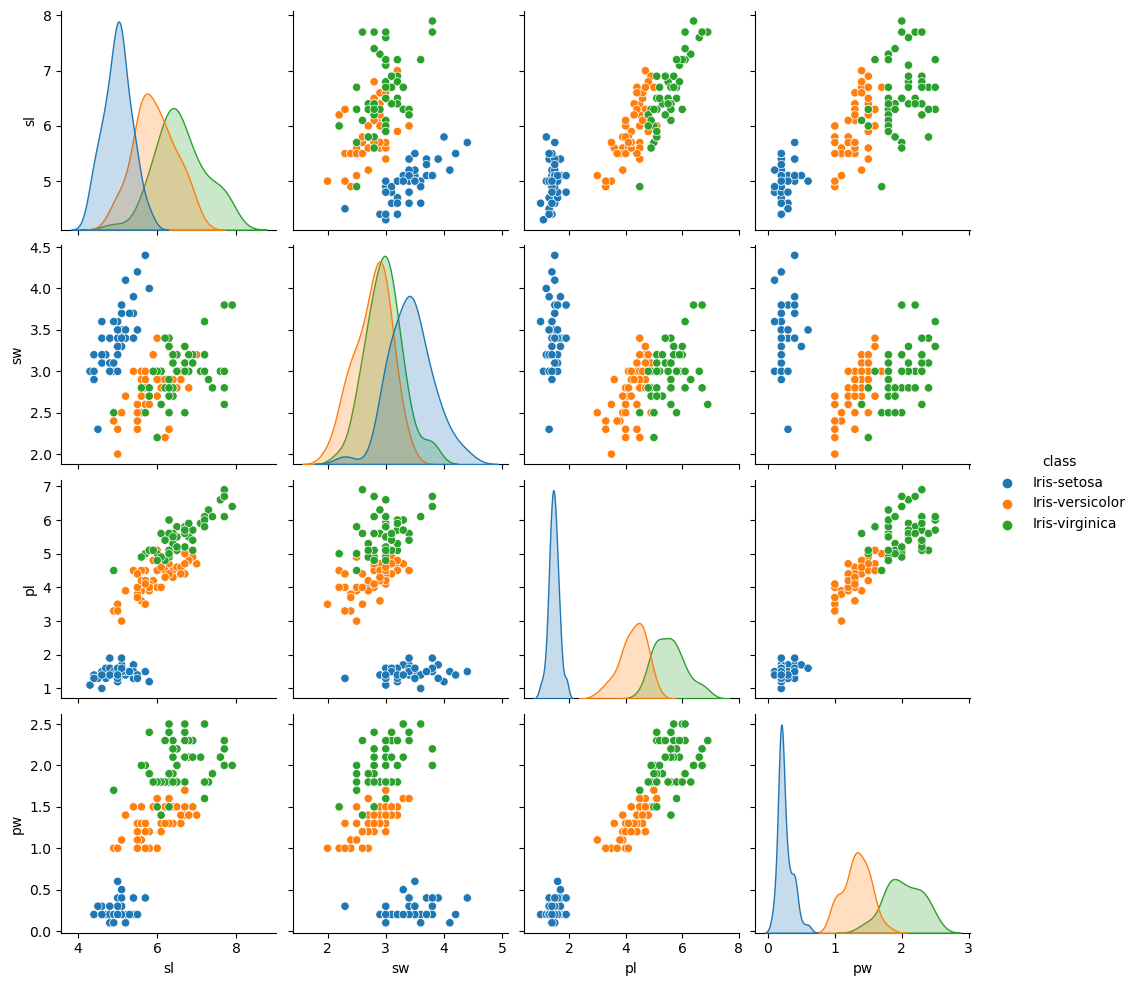

In [10]:
sns.pairplot(data=df, hue='class')
plt.show()

We use linear interpolation method, because data exhibits gradual changes between consecutive data points. It assumes a straight line between two neighboring points and fills the missing value with values along this line.

In [11]:
data_interpolate = df.copy()
data_interpolate.interpolate(inplace=True)
data_interpolate.isna().sum()

sl       0
sw       0
pl       0
pw       0
class    1
dtype: int64

Interpolation is good for numerical values, but cannot fill the missing values in a columns with categorical data.

#### Option 3(numerical):
Now we can use `mean` method for filling missing data in numerical values. Important point to make is, that we should take a mean value for each group separately and then fill missing values with mean value only for that group.

First of all, we group all columns separately and estimate their mean value to show that, the mean value for each group is different.

In [12]:
sl_mean = df.groupby('class')['sl'].mean()
sw_mean = df.groupby('class')['sw'].mean()
pl_mean = df.groupby('class')['pl'].mean()
pw_mean = df.groupby('class')['pw'].mean()

print(sl_mean)
print(sw_mean)
print(pl_mean)
print(pw_mean)

class
Iris-setosa        4.99375
Iris-versicolor    5.93600
Iris-virginica     6.58800
Name: sl, dtype: float64
class
Iris-setosa        3.427083
Iris-versicolor    2.770000
Iris-virginica     2.974000
Name: sw, dtype: float64
class
Iris-setosa        1.4625
Iris-versicolor    4.2600
Iris-virginica     5.5520
Name: pl, dtype: float64
class
Iris-setosa        0.253191
Iris-versicolor    1.326000
Iris-virginica     2.026000
Name: pw, dtype: float64


Now we replace NaN values with mean values for each classification

In [13]:
data_mean = df.copy()

data_mean['sl'].fillna(data_mean.groupby('class')['sl'].transform('mean'), inplace=True)
data_mean['sw'].fillna(data_mean.groupby('class')['sw'].transform('mean'), inplace=True)
data_mean['pl'].fillna(data_mean.groupby('class')['pl'].transform('mean'), inplace=True)
data_mean['pw'].fillna(data_mean.groupby('class')['pw'].transform('mean'), inplace=True)
data_mean.isna().sum()

sl       0
sw       0
pl       0
pw       0
class    1
dtype: int64

### Categorical data.
#### Option 2(categorical) for option 1 see above:
We can use both `bfill` and `ffill` methods for filling the missing categorical data, which is in `class` column, because we saw in the table output in the beginning, that the first and the last columns in the initial dataframe are not NaN. Let's use ffill in this case:

In [14]:
data_ffill = df.copy()
data_ffill['class'].fillna(method='ffill', inplace=True)
data_ffill.isna().sum()

sl       1
sw       1
pl       1
pw       2
class    0
dtype: int64

As you can see, we got rid of all NaN values in `class` column, by filling them with the value from the following row

#### Option 3(categorical):
Now we are going to use the DecisionTreeRegressor to train the model based on features and predict, which class the the flower can belong to based on those features.

First, we separate dependent `y` and independent `X` variables, where X are the first four columns and y is the last column. We also remove the row with the NaN categorical value, to be able to carry out the training properly.

In [15]:
X = df[df.iloc[:, -1].notna()].iloc[:, :-1]
y = df[df.iloc[:, -1].notna()].iloc[:, -1]

We replace the missing values with mean values for corresponding groups.

In [16]:
X['sl'].fillna(data_mean.groupby('class')['sl'].transform('mean'), inplace=True)
X['sw'].fillna(data_mean.groupby('class')['sw'].transform('mean'), inplace=True)
X['pl'].fillna(data_mean.groupby('class')['pl'].transform('mean'), inplace=True)
X['pw'].fillna(data_mean.groupby('class')['pw'].transform('mean'), inplace=True)

We transform X and y to arrays, in order to be able to use them with LabelEncoder

In [17]:
X_val = X.values
y_val = y.values

We define a LabelEncoder and then transform our class values to numerical values, because to train and test model, we need a numerical value.

In [18]:
le = LabelEncoder()
y_val = le.fit_transform(y_val)
print(y_val)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


Now we define the DecisionTreeRegressor and with the help of function `fit`, we train the model giving the dependent and independent values as parameters.

In [19]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_val, y_val)

DecisionTreeRegressor(random_state=0)

We use `data_mean` dataframe from above as a main dataframe, because it is already filled with mean values in numerical columns. After that we find the rows with NaN values in the `class` column, predict the missing values for `class` using our regressor, transform our resulted array back from numerical to categorical value and in the end assign the predicted values to the `class` column in the main dataframe

In [20]:
# Assign the rows where there is a NaN value in class column
missing_rows = data_mean[data_mean['class'].isna()]

# Predict the missing values for 'class' using your regressor
predicted_values = regressor.predict(missing_rows.iloc[:, :-1].values)
predicted_value = [predicted_values[0].astype(int)]
original_y = le.inverse_transform(predicted_value)

# Assign the predicted values to the 'class' column in the original DataFrame
data_mean.loc[data_mean['class'].isna(), 'class'] = original_y
data_mean

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In the end we can check now, if there are any NaN values left in our dataframe

In [21]:
data_mean.isna().sum()

sl       0
sw       0
pl       0
pw       0
class    0
dtype: int64

In [22]:
data_mean.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.838625,3.054847,3.758417,1.200709
std,0.830890,0.432653,1.764745,0.760399
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Conclusion:
Choosing how to fill in missing data depends on the dataset and what you want to find out. You should think about the data itself, how much is missing, and how it might affect your analysis. In practice, a combination of these methods may be employed for different parts of the dataset, and the results should be evaluated to determine the best approach for addressing missing data in your particular project.

Based on the data presented in the graph above, we can also draw some conclusions regarding possible classification:

1. **Data Relationships:** The graph makes it clear to understand the relationship between the classes. Scatterplots make it easy to identify the correlation between the properties and features of the classes.

2. **Differences:** Similar to relationships, we can also examine the differences between the respective classes. Scatterplots allow us to recognize the variations between the features.

3. **Color Differentiation:** It enables the analyst to quickly identify the classes, which is not easily discernible from the table.

These insights help in understanding and classifying the data effectively.